In [9]:
#! pip install tweepy
#! pip install textblob
#! pip install wordcloud

In [10]:
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt

In [11]:
plt.style.use('fivethirtyeight')

In [27]:
pd.set_option('display.max_colwidth', None)

In [12]:
import cred

In [13]:
# create the authentication object
authenticate = tweepy.OAuthHandler(consumer_key= cred.API_key, consumer_secret=cred.API_secret_key)

In [14]:
# Set the access token and access token secret
authenticate.set_access_token(cred.Access_token, cred.Access_token_secret)

In [15]:
# create the API
api = tweepy.API(authenticate, wait_on_rate_limit=True)

In [17]:
# Extract 100 tweets from the user
posts = api.user_timeline(screen_name='BillGates', count=100, lang='en', tweet_mode='extended')

Unexpected parameter: lang


In [22]:
# printing top 5 tweets 
i=1
for tweet in posts[0:5]:
    print(str(i) + ') ' + tweet.full_text + '\n')
    i+=1

1) To have any hope of reaching net zero and halting the progress of climate change, we need deep and comprehensive collaboration between the public and private sectors worldwide. I was encouraged by today’s discussions about how to accelerate innovation. https://t.co/VHFFOSykZk

2) The omicron surge is an unfortunate reminder that the only way to eliminate the threat of COVID-19 somewhere is to eliminate it everywhere. That’s why @gatesfoundation is joining @wellcometrust to renew our investment in @CEPIvaccines. https://t.co/flVoKq3H3l

3) Genomic sequencing is a critical tool that will help us fight COVID-19 and prevent the next pandemic. https://t.co/lCP74qexkB

4) The fight to eradicate HIV is far from over, but incredible progress has been made through scientific innovation, activism, and collective global action. These lessons provide a path forward with COVID-19 and hope for preventing the next pandemic. https://t.co/ztb8d6BHZP

5) ICYMI here’s a recap of my conversation with @

In [28]:
df = pd.DataFrame([tweet.full_text for tweet in posts], columns=['Tweets'])
df.head()

,Tweets
0,"To have any hope of reaching net zero and halting the progress of climate change, we need deep and comprehensive collaboration between the public and private sectors worldwide. I was encouraged by today’s discussions about how to accelerate innovation. https://t.co/VHFFOSykZk"
1,The omicron surge is an unfortunate reminder that the only way to eliminate the threat of COVID-19 somewhere is to eliminate it everywhere. That’s why @gatesfoundation is joining @wellcometrust to renew our investment in @CEPIvaccines. https://t.co/flVoKq3H3l
2,Genomic sequencing is a critical tool that will help us fight COVID-19 and prevent the next pandemic. https://t.co/lCP74qexkB
3,"The fight to eradicate HIV is far from over, but incredible progress has been made through scientific innovation, activism, and collective global action. These lessons provide a path forward with COVID-19 and hope for preventing the next pandemic. https://t.co/ztb8d6BHZP"
4,"ICYMI here’s a recap of my conversation with @devisridhar. We chatted about this pandemic, how to prevent the next one, and a few things in between. https://t.co/UKOGoXm9EL"


In [29]:
# function to clean the text

def cleanTweets(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text) # remove @mentions
    text = re.sub(r'#', '', text) # removes '#' symbol
    text = re.sub(r'RT[\s]+', '', text) # removes RT
    text = re.sub(r'https:\/\/\S+', '', text) # removes the hyperlink
    
    return text

In [30]:
df['Tweets'] = df['Tweets'].apply(cleanTweets)

In [31]:
df.head()

,Tweets
0,"To have any hope of reaching net zero and halting the progress of climate change, we need deep and comprehensive collaboration between the public and private sectors worldwide. I was encouraged by today’s discussions about how to accelerate innovation."
1,The omicron surge is an unfortunate reminder that the only way to eliminate the threat of COVID-19 somewhere is to eliminate it everywhere. That’s why is joining to renew our investment in .
2,Genomic sequencing is a critical tool that will help us fight COVID-19 and prevent the next pandemic.
3,"The fight to eradicate HIV is far from over, but incredible progress has been made through scientific innovation, activism, and collective global action. These lessons provide a path forward with COVID-19 and hope for preventing the next pandemic."
4,"ICYMI here’s a recap of my conversation with . We chatted about this pandemic, how to prevent the next one, and a few things in between."


In [32]:
# create a function to get the subjectivity of the text- subjectivity tells how subjective or opinionated the text is 
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

# create a function to get the polarity of the text
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

df['Subjectivity'] = df['Tweets'].apply(getSubjectivity)
df['Polarity'] = df['Tweets'].apply(getPolarity)

In [33]:
df.head()

,Tweets,Subjectivity,Polarity
0,"To have any hope of reaching net zero and halting the progress of climate change, we need deep and comprehensive collaboration between the public and private sectors worldwide. I was encouraged by today’s discussions about how to accelerate innovation.",0.210417,0.00
1,The omicron surge is an unfortunate reminder that the only way to eliminate the threat of COVID-19 somewhere is to eliminate it everywhere. That’s why is joining to renew our investment in .,1.000000,-0.25
2,Genomic sequencing is a critical tool that will help us fight COVID-19 and prevent the next pandemic.,0.400000,0.00
3,"The fight to eradicate HIV is far from over, but incredible progress has been made through scientific innovation, activism, and collective global action. These lessons provide a path forward with COVID-19 and hope for preventing the next pandemic.",0.400000,0.22
4,"ICYMI here’s a recap of my conversation with . We chatted about this pandemic, how to prevent the next one, and a few things in between.",0.050000,-0.10


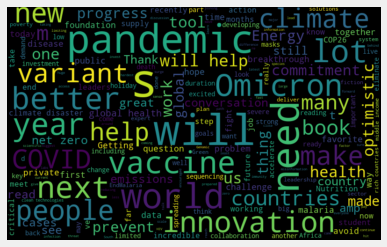

In [35]:
# Plot the word cloud
all_words = ' '.join([twts for twts in df['Tweets']])
wordCloud = WordCloud(width=800, height=500, random_state=101, max_font_size=100).generate(all_words)

plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [36]:
# function to compute negative, positive and neutral sentiments of the tweets
def getSentiment(score):
    if score<0:
        return 'Negative'
    elif score==0:
        return 'Neutral'
    else:
        return 'Positive'

df['Sentiment'] = df['Polarity'].apply(getSentiment)

In [37]:
df.head()

,Tweets,Subjectivity,Polarity,Sentiment
0,"To have any hope of reaching net zero and halting the progress of climate change, we need deep and comprehensive collaboration between the public and private sectors worldwide. I was encouraged by today’s discussions about how to accelerate innovation.",0.210417,0.00,Neutral
1,The omicron surge is an unfortunate reminder that the only way to eliminate the threat of COVID-19 somewhere is to eliminate it everywhere. That’s why is joining to renew our investment in .,1.000000,-0.25,Negative
2,Genomic sequencing is a critical tool that will help us fight COVID-19 and prevent the next pandemic.,0.400000,0.00,Neutral
3,"The fight to eradicate HIV is far from over, but incredible progress has been made through scientific innovation, activism, and collective global action. These lessons provide a path forward with COVID-19 and hope for preventing the next pandemic.",0.400000,0.22,Positive
4,"ICYMI here’s a recap of my conversation with . We chatted about this pandemic, how to prevent the next one, and a few things in between.",0.050000,-0.10,Negative


In [49]:
# Print all positive tweets
j=1
for i in range(0, len(df)):
    if df['Sentiment'][i] == 'Positive':
        print(str(j) + ') ' +  df['Tweets'][i] + '\n')
        j+=1

1) The fight to eradicate HIV is far from over, but incredible progress has been made through scientific innovation, activism, and collective global action. These lessons provide a path forward with COVID-19 and hope for preventing the next pandemic. 

2) Thanks  for taking the time today to discuss omicron, vaccines, and how the world can come together to prevent the next pandemic. 

3) :       We definitely can. Thanks for your time &amp; insights &amp; let's continue the goo…

4)      .  has started the conversation about how we avoid the next pandemic which is important. I appreciate your work on this. We can do a lot better next time!!

5)     A more transmissive variant is not likely but we have been surprised a lot during this pandemic. Omicron will create a lot of immunity at least for the next year.   tracks the genetics really well. We may have to take yearly shots for Covid for some time.

6)     As countries experience their Omicron wave health systems will be challenged. M

In [48]:
# Print all negative tweets
j=1
for i in range(0, len(df)):
    if df['Sentiment'][i] == 'Negative':
        print(str(j) + ') ' +  df['Tweets'][i] + '\n')
        j+=1

1) The omicron surge is an unfortunate reminder that the only way to eliminate the threat of COVID-19 somewhere is to eliminate it everywhere. That’s why  is joining  to renew our investment in . 

2) ICYMI here’s a recap of my conversation with . We chatted about this pandemic, how to prevent the next one, and a few things in between. 

3) :     So tough question: where do you think SARS-CoV-2 came from? What data do you want to see? An…

4)     People like you and I and Tony Fauci have been subject to a lot of misinformation. I didn't expect that. Some of it like me putting chips in arms doesn't make sense to me - why would I want to do that?

5) :   One major problem has been online misinformation on Facebook &amp; other platforms around vaccines, masks and…

6)   Do you think the world will come together to get ready for the next one? I hope so but I am not sure.

7)  mRna vaccines still can't meet all the demand so figuring out who gets what is complicated.

8) We have some, but n

In [51]:
p_tweets = df[df['Sentiment']=="Positive"]
n_tweets = df[df['Sentiment']=="Negative"]

In [56]:
print("Percentage of positive tweets: " , len(p_tweets)/len(df)*100)

Percentage of positive tweets:  68.0


In [57]:
print("Percentage of negative tweets: " , len(n_tweets)/len(df)*100)

Percentage of negative tweets:  16.0


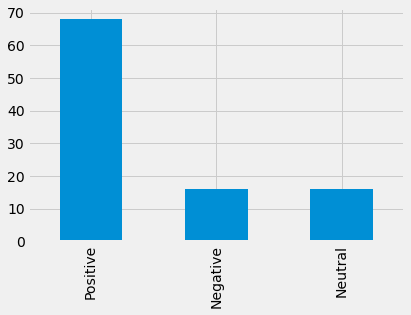

In [60]:
df['Sentiment'].value_counts().plot(kind='bar')
plt.show()